<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/clustering_candies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering categorías de golosinas

## Análisis exploratorio de datos

 Comenzamos cargando el conjunto de datos y revisando las primeras filas.

## Cargar el conjunto de datos y revisar las primeras filas.

In [1]:
# Importamos pandas
import pandas as pd

# Cargando el datset
candy_data = pd.read_csv('/content/drive/MyDrive/candy.csv')

# Mostrando las primeras 5 filas del dataset
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Este conjunto de datos contiene información sobre diferentes tipos de dulces. Las columnas son las siguientes:

1. '**competitorname**': Nombre del dulce.  
2. '**chocolate**': Indica si el dulce contiene chocolate (1) o no (0).  
3. '**fruity**': Indica si el dulce tiene sabor a frutas (1) o no (0).  
4. '**caramel**': Indica si el dulce contiene caramelo (1) o no (0).  
5. '**peanutyalmondy**': Indica si el dulce contiene cacahuetes o almendras (1) o no (0).  
6. '**nougat**': Indica si el dulce contiene nougat (1) o no (0).  
7. '**crispedricewafer**': Indica si el dulce contiene arroz inflado o barquillo (1) o no (0).  
8. '**hard**': Indica si el dulce es duro (1) o no (0).  
9. '**bar**': Indica si el dulce es una barra (1) o no (0).  
10. '**pluribus**': Indica si el dulce se vende en paquetes con múltiples piezas (1) o no (0).  
11. '**sugarpercent**': Porcentaje de azúcar en el dulce.  
12. '**pricepercent**': Precio relativo del dulce en comparación con otros dulces en el conjunto de datos.  
13. '**winpercent**': Porcentaje de victorias en comparación con otros dulces en el conjunto de datos.  

## Obtener información sobre los tipos de datos y la cantidad de valores faltantes.

Continuamos obteniendo información sobre los tipos de datos y la cantidad de valores faltantes en el conjunto de datos.

In [2]:
# Información de los tipos de datos y valores faltantes
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


El conjunto de datos tiene 85 entradas y 13 columnas. No hay valores faltantes en ninguna de las columnas. Además, podemos observar que la mayoría de las columnas son de tipo entero (int64) o de punto flotante (float64), excepto la columna competitorname, que es de tipo objeto (generalmente una cadena de texto).

## Realizar un análisis descriptivo de las variables.

Haremos un análisis descriptivo de las variables para obtener una idea de la distribución de los datos.

In [3]:
# Estadísticas descriptivas de las variables
candy_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


Aquí están las estadísticas descriptivas de las variables:

1. Las columnas '**chocolate**', '**fruity**', '**caramel**', '**peanutyalmondy**', '**nougat**', '**crispedricewafer**', '**hard**', '**bar**', y '**pluribus**' son variables binarias (0 o 1). Podemos ver que la mayoría de los dulces en este conjunto de datos no contienen chocolate, no son afrutados, no contienen caramelo, cacahuetes ni almendras, nougat, arroz inflado o barquillo, y no son duros. Sin embargo, más de la mitad de los dulces se venden en paquetes con múltiples piezas.  
2. '**sugarpercent**': El porcentaje de azúcar varía entre 0.011 y 0.988, con una media de aproximadamente 0.479.  
3. '**pricepercent**': El precio relativo de los dulces varía entre 0.011 y 0.976, con una media de aproximadamente 0.469.  
4. '**winpercent**': El porcentaje de victorias varía entre 22.45 y 84.18, con una media de aproximadamente 50.32.  

## Visualizar las distribuciones de las variables numéricas.

Vamos a visualizar las distribuciones de las variables numéricas y posibles correlaciones entre las variables.

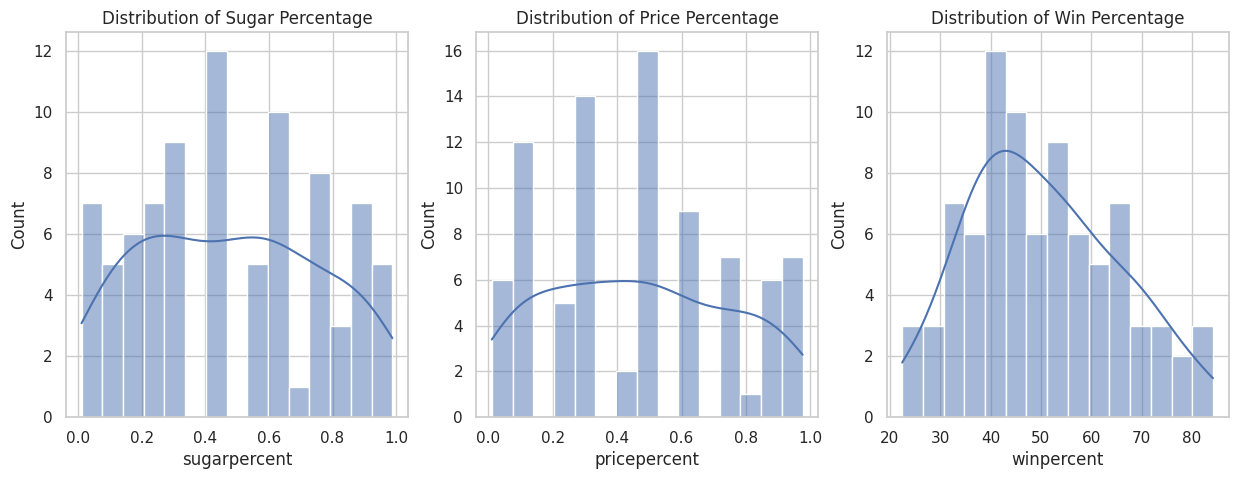

In [4]:
# Importamos matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de la visualización
sns.set(style="whitegrid")

# Dibuja un gráfico de barras de los recuentos de valores de 'winpercent'
plt.figure(figsize=(15, 5))

# Grafica la distribución de sugarpercent, pricepercent y winpercent
plt.subplot(1, 3, 1)
sns.histplot(candy_data['sugarpercent'], kde=True, bins=15)
plt.title('Distribution of Sugar Percentage')

plt.subplot(1, 3, 2)
sns.histplot(candy_data['pricepercent'], kde=True, bins=15)
plt.title('Distribution of Price Percentage')

plt.subplot(1, 3, 3)
sns.histplot(candy_data['winpercent'], kde=True, bins=15)
plt.title('Distribution of Win Percentage')

plt.show()

Aquí están las distribuciones de las variables numéricas:  

1. **Distribución del porcentaje de azúcar ('sugarpercent')**: La mayoría de los dulces en este conjunto de datos tienen un porcentaje de azúcar entre 0.4 y 0.6, pero hay una variedad de dulces con diferentes porcentajes de azúcar.  
2. **Distribución del porcentaje de precio ('pricepercent')**: La mayoría de los dulces en este conjunto de datos tienen un porcentaje de precio entre 0.4 y 0.6, pero hay una variedad de dulces con diferentes porcentajes de precio.  
3. **Distribución del porcentaje de victorias ('winpercent')**: La mayoría de los dulces en este conjunto de datos tienen un porcentaje de victorias alrededor de 40-60%, pero hay una variedad de dulces con diferentes porcentajes de victorias.  

## Identificar y visualizar posibles correlaciones entre las variables.

Vamos a identificar y visualizar posibles correlaciones entre las variables en el conjunto de datos.

<ipython-input-6-bb5f9d420657>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = candy_data.corr()


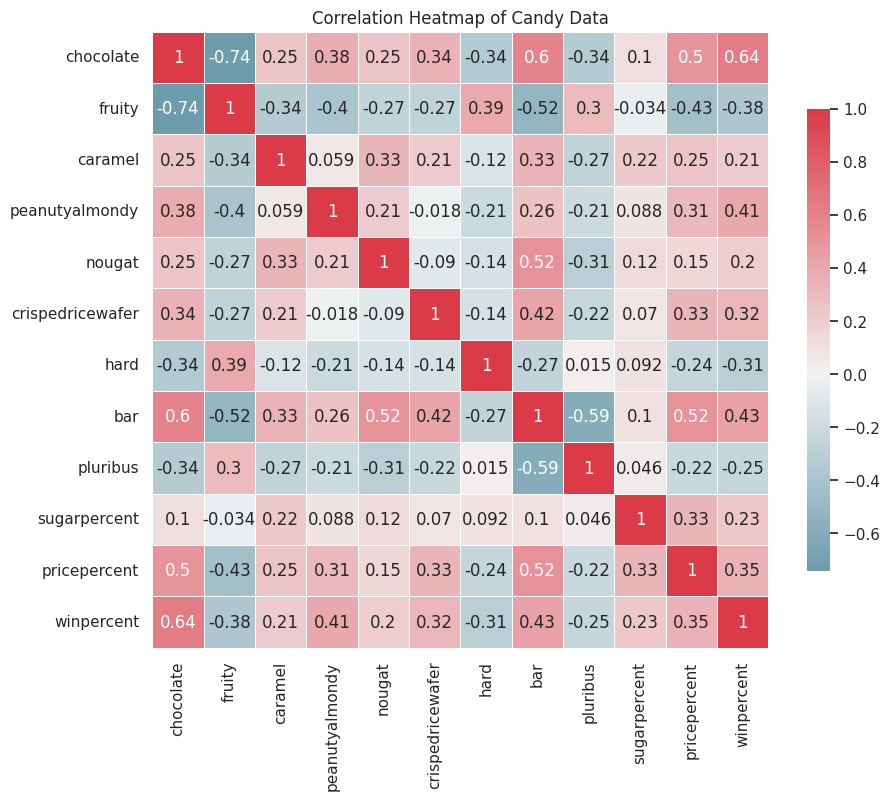

In [6]:
# Grafica la distribución de sugarpercent, pricepercent y winpercent
corr = candy_data.corr()

# Configura la figura de matplotlib
plt.figure(figsize=(10, 8))

# Generar una paleta de colores divergente personalizada
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibuja la matriz de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.75}, annot=True)

plt.title('Correlation Heatmap of Candy Data')
plt.show()

## Clustering con scikit-learn

Antes de aplicar el algoritmo de clustering, vamos a estandarizar las características numéricas para que tengan una media de 0 y una desviación estándar de 1. Esto es importante porque el algoritmo K-Means se basa en la distancia euclidiana entre los puntos, y las características con escalas diferentes pueden tener un impacto desproporcionado en el resultado del clustering.  

Después de estandarizar las características, aplicaremos el algoritmo K-Means y visualizaremos los resultados del clustering. Vamos a utilizar el método del codo para determinar el número óptimo de clusters.  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

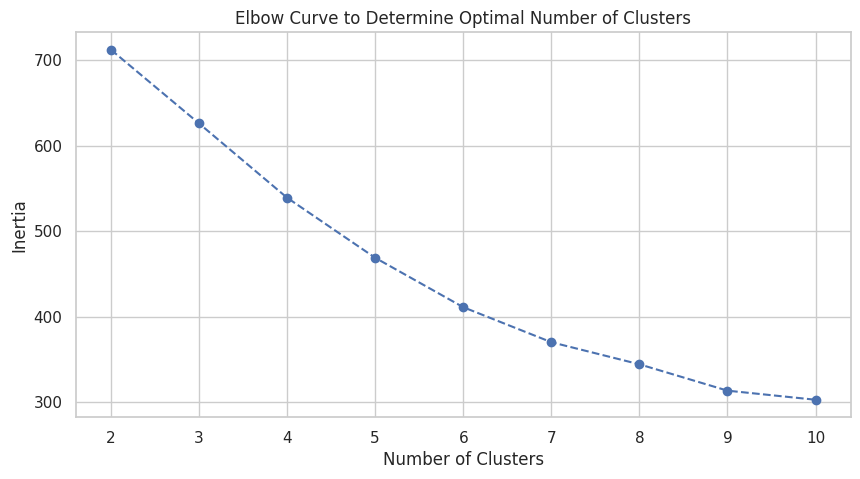

In [9]:
# De sklearn importamos preprocessing, cluster y metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Eliminar la columna no numérica
X = candy_data.drop('competitorname', axis=1)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clústeres utilizando el método del codo
inertia = []
silhouette_scores = []

# Probar hasta 10 clústeres
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Graficar la curva del codo
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal Number of Clusters')
plt.show()

El gráfico muestra la curva del codo, que se utiliza para determinar el número óptimo de clusters. La "inercia" en el eje Y representa la suma de las distancias al cuadrado de cada punto a su centroide más cercano. A medida que aumenta el número de clusters, la inercia disminuye porque los puntos están más cerca de los centroides de sus clusters. Sin embargo, después de un cierto punto, el beneficio de agregar más clusters disminuye.  

En este caso, podemos observar que el "codo" de la curva parece estar alrededor de 4 clusters, ya que la tasa de disminución de la inercia se vuelve más lenta después de ese punto. Por lo tanto, vamos a utilizar 4 clusters para el análisis de clustering y mostraremos los resultados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


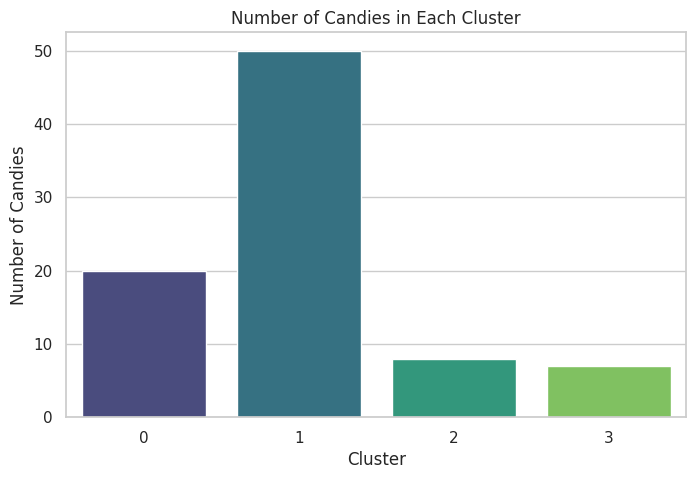

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,3
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [14]:
# Aplicar KMeans con el número óptimo de clústeres
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Agregar las etiquetas de clúster al conjunto de datos original
candy_data['cluster'] = kmeans.labels_

# Mostrar el recuento de dulces en cada clúster
cluster_counts = candy_data['cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Candies')
plt.title('Number of Candies in Each Cluster')
plt.show()

# Mostrar las primeras filas del conjunto de datos con las etiquetas de clúster
candy_data.head()

Hemos aplicado el algoritmo K-Means con 4 clusters al conjunto de datos de dulces, y añadido las etiquetas de los clusters a la columna cluster del conjunto de datos original.  

En el gráfico, se muestra el número de dulces en cada cluster. Podemos ver que los clusters tienen diferentes cantidades de dulces.  

Para visualizar los diferentes clusters en una gráfica, vamos a utilizar la técnica de reducción de dimensionalidad llamada **Análisis de Componentes Principales** (PCA, por sus siglas en inglés). PCA transforma las características originales en un nuevo conjunto de características llamadas componentes principales, que son combinaciones lineales de las características originales.  

Esto permite visualizar las relaciones entre las observaciones en un espacio de menor dimensionalidad, como un gráfico bidimensional.  

Vamos a aplicar PCA para reducir las características a dos dimensiones y luego trazar los puntos en un gráfico bidimensional, coloreando los puntos según su etiqueta de cluster.

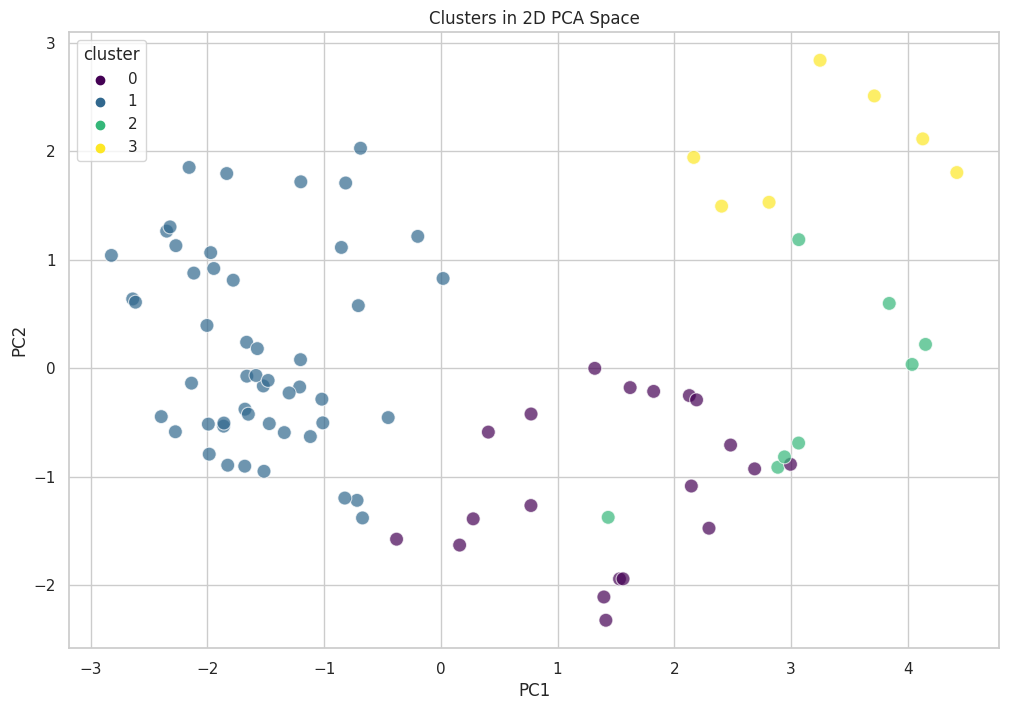

In [15]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir las características a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de PCA y las etiquetas de clúster
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = candy_data['cluster']

# Plotear los clústeres en el espacio 2D definido por el PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters in 2D PCA Space')
plt.show()

Aquí está la visualización de los clusters en un espacio bidimensional definido por el Análisis de Componentes Principales (PCA). Cada punto en el gráfico representa un dulce, y los puntos están coloreados según su etiqueta de cluster. Podemos ver que los clusters se separan bastante bien en este espacio de dos dimensiones.